In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
import matplotlib.ticker as ticker
m= 1
k = 1
b=0.05
alpha = 0.25
F0 = 7.5
wf = 1
x0= 3.001
v0x= 0

In [192]:
N=100000
tfinal=80
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0
dt=tfinal/N

In [193]:
def acelera(t, x, vx):
    return -(4*alpha*(x**3) + b*vx - F0*math.cos(wf*t))/m

def rk4_x_vx(t, x, vx, acelera, dt):
    ax1 = acelera(t, x, vx)
    c1v = ax1 * dt
    c1x = vx * dt

    ax2 = acelera(t + dt/2., x + c1x/2., vx + c1v/2.)
    c2v = ax2 * dt
    c2x = (vx + c1v/2.) * dt

    ax3 = acelera(t + dt/2., x + c2x/2., vx + c2v/2.)
    c3v = ax3 * dt
    c3x = (vx + c2v/2.) * dt

    ax4 = acelera(t + dt, x + c3x, vx + c3v)
    c4v = ax4 * dt
    c4x = (vx + c3v) * dt

    xp = x + (c1x + 2*c2x + 2*c3x + c4x) / 6.
    vxp = vx + (c1v + 2*c2v + 2*c3v + c4v) / 6.
    return xp, vxp

In [194]:
for i in range(N-1):
    xt[i+1], vxt[i+1] = rk4_x_vx(t[i], xt[i], vxt[i], acelera, dt)
    t[i+1]= t[i] + dt

Text(0, 0.5, 'v (m/s)')

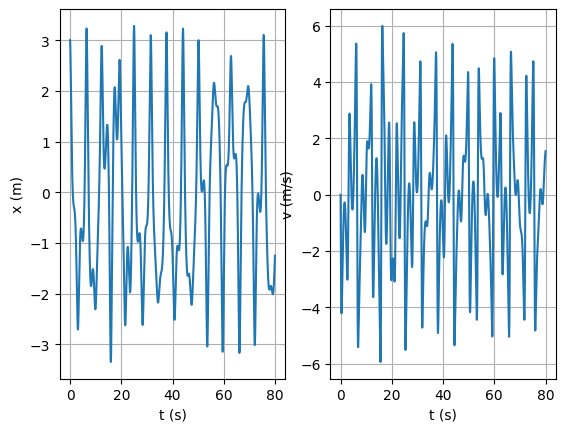

In [195]:
figure, axis = plt.subplots(1,2)
axis[0].grid(True)
axis[1].grid(True)
axis[0].plot(t, xt, linestyle="-")
axis[0].set_xlabel("t (s)")
axis[0].set_ylabel("x (m)")
axis[1].plot(t, vxt, linestyle="-")
axis[1].set_xlabel("t (s)")
axis[1].set_ylabel("v (m/s)")

In [196]:
x0= 2.999
N=100000
tfinal=80
xt2= np.empty(N)
xt2[0]=2.999
vxt2= np.empty(N)
vxt2[0]=v0x
t2 = np.empty(N)
t2[0] = 0
dt=tfinal/N

In [197]:
for i in range(N-1):
    xt2[i+1], vxt2[i+1] = rk4_x_vx(t[i], xt2[i], vxt2[i], acelera, dt)
    t2[i+1]= t2[i] + dt

In [198]:
axis[0].plot(t2, xt2, linestyle="-")
axis[1].plot(t2, vxt2, linestyle="-")

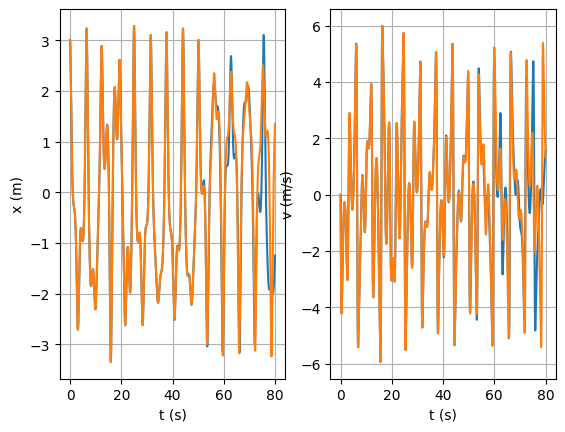

In [199]:
figure

In [200]:
#Perdemos confian√ßa aos aproximadamente 73 segundos